# **Demography of Coders in 2020**




In this notebook, I will try to answer how the age and country can affect people to learn about code


1.   What is the age range trend of coders?
2.   What is the most used programming language in an age range?
3.   How is the correlation between 1st age code in a country based on its age range? 



## **Data Understanding**
We can answer those questions by analyzing the data that provided by Stack Overflow. Stack Overflow made a survey for coders in 2020.

### **Load Libraries For this Porject**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

We load Pandas and pyplot for this project. These libraries will be heavily used for this project.

### **Load and Filter Data needed**

The data is saved in google drive for easiness.

In [2]:
#The data is saved in google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For understanding the data, we only use the desired column to answer the question above.
The desired columns are mainly about the background of respondent.

In [3]:
# Load data from csv
df = pd.read_csv('/content/drive/MyDrive/Dataset Udacity/Stack Overflow 2020/survey_results_public.csv')

# Show only the desired column
column = ['Age1stCode','Country','YearsCode','LanguageWorkedWith']

df = df[column]

df.head()

,Age1stCode,Country,YearsCode,LanguageWorkedWith
0,13,Germany,36,C#;HTML/CSS;JavaScript
1,19,United Kingdom,7,JavaScript;Swift
2,15,Russian Federation,4,Objective-C;Python;Swift
3,18,Albania,7,NaN
4,16,United States,15,HTML/CSS;Ruby;SQL


## **Data Preparation**

### **Filter only data without null value**

We are interested in respondent that has all the value of each column that we call. So null value can't be called because we don't want to fill value based on automatic substitution. A substitution of null value will interfere in classifying data that we want.

In [4]:
#Delete all the null value in the table
df = df.dropna()

### **Add column that consist of respondent's age**
To know the age trend, we need to know the respondent's age. We can calculate the age from the given data.

In [5]:
#Find the Age of Each Respondent using its Age1stCode and YearsCode
df['Age1stCode'] = df['Age1stCode'].apply(pd.to_numeric, errors='coerce')
df['YearsCode'] = df['YearsCode'].apply(pd.to_numeric, errors='coerce')
pd.options.display.float_format = '{:,.0f}'.format

df['Age'] = df.Age1stCode + df.YearsCode
df.head()

,Age1stCode,Country,YearsCode,LanguageWorkedWith,Age
0,13,Germany,36,C#;HTML/CSS;JavaScript,49
1,19,United Kingdom,7,JavaScript;Swift,26
2,15,Russian Federation,4,Objective-C;Python;Swift,19
4,16,United States,15,HTML/CSS;Ruby;SQL,31
5,14,Germany,6,HTML/CSS;Java;JavaScript,20


### **Classify the respondent based on its age**
Working age group is between 15 and 64. From the data above we will classified the data based on its age with the range of 10 for each class.

In [6]:
#Only take respondent who are in working age group from 15 to 64
df = df[(df['Age'] >= 15) & (df['Age'] <= 64)]

class_list = [9.9,19.9,29.9,39.9,49.9,59.9,69.9]
class_name = ['10s', '20s', '30s', '40s','50s','60s']

df['AgeTrend'] = pd.cut(df['Age'], class_list , labels = class_name)
df.head()

,Age1stCode,Country,YearsCode,LanguageWorkedWith,Age,AgeTrend
0,13,Germany,36,C#;HTML/CSS;JavaScript,49,40s
1,19,United Kingdom,7,JavaScript;Swift,26,20s
2,15,Russian Federation,4,Objective-C;Python;Swift,19,10s
4,16,United States,15,HTML/CSS;Ruby;SQL,31,30s
5,14,Germany,6,HTML/CSS;Java;JavaScript,20,20s


### **Create Function to plot data**

## **Analysis**

After the data is cleaned, we are trying to answer the question using several analysis

### **Age Range Trend for Coders**

To know the age trend of coders, we simply plot the data based on the age range.



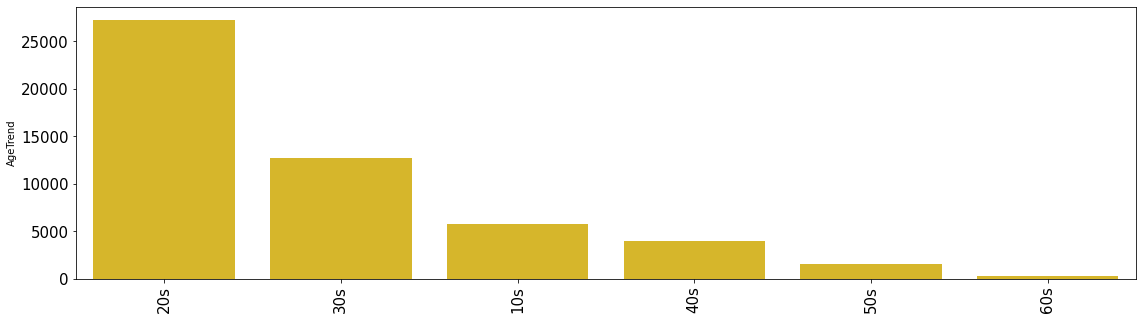

In [8]:
#Plot the total of respondent based on the age group
plt.figure(figsize=(19,5))
plt.xticks(rotation='vertical', fontsize=15.0)
plt.yticks(fontsize=15.0)
sns.barplot(x=df['AgeTrend'].value_counts().index, y=df['AgeTrend'].value_counts(), color="#F2C80F", order=df['AgeTrend'].value_counts().index)
plt.show()

As you can see, the coders are mostly in their 20s. People in 20s are born from 1990s to 2000, when technology thrived at a high pace. Followed by people in 30s then 10s. It shows that people in 10s have a high curiosity in programming language.

### **Most used programming Language in an age range**

To know the most used programming Language in an age range, we have to split list in *LanguageWorkedWith* column and total users of each Language in each Age Group.

In [9]:
#Make a table that consist of all programming language in LanguageWorkedWith column and classify it to each age group
d_list = []

for index, row in df.iterrows():
    for value in str(row['LanguageWorkedWith']).split(';'):
        d_list.append({'AgeTrend':row['AgeTrend'], 
                       'Language':value})
df_Language = df.append(d_list, ignore_index=True)
df_Language = df_Language.groupby('AgeTrend')['Language'].value_counts()
df_Language = df_Language.unstack(level=-1).fillna(0)
df_Language

Language,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Objective-C,PHP,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
AgeTrend,,,,,,,,,,,,,,,,,,,,,,,,,
10s,525,1757,1648,1704,1861,314,454,3899,168,2563,3812,41,448,134,1451,70,3151,319,362,408,2744,117,329,1191,290
20s,1682,8569,6189,8237,6692,1201,2426,17503,616,11658,18871,237,2335,1022,7408,527,12495,1650,1828,1444,14994,965,1605,7521,1346
30s,491,4799,1932,4399,2273,314,1250,7856,211,4581,8906,79,955,637,3270,507,4949,673,1064,623,7463,588,724,3582,824
40s,262,1717,827,1485,858,107,370,2348,66,1411,2592,40,238,208,946,290,1515,223,314,163,2438,156,242,919,389
50s,137,681,418,551,432,40,104,843,24,503,920,18,66,88,312,165,629,90,89,47,958,43,125,246,201
60s,36,110,91,103,96,6,16,136,10,81,162,7,14,21,61,38,104,18,17,9,177,9,22,37,50


Then, we are going to find the top 5 programming language for each Age group

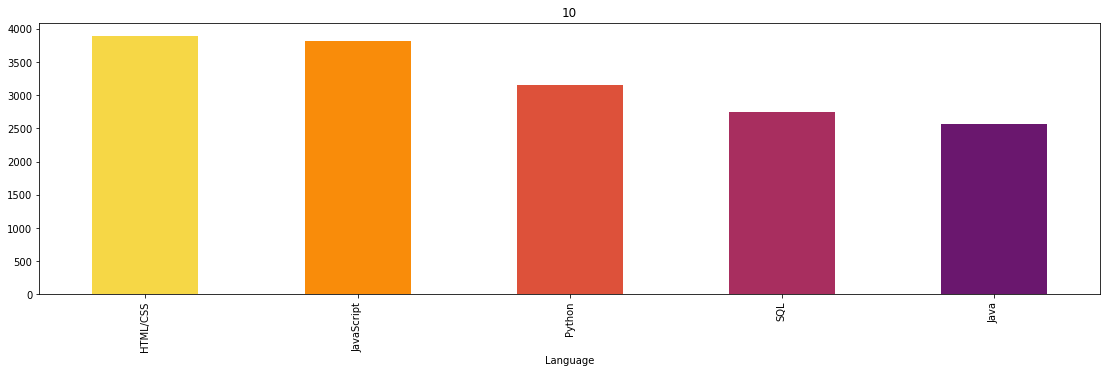

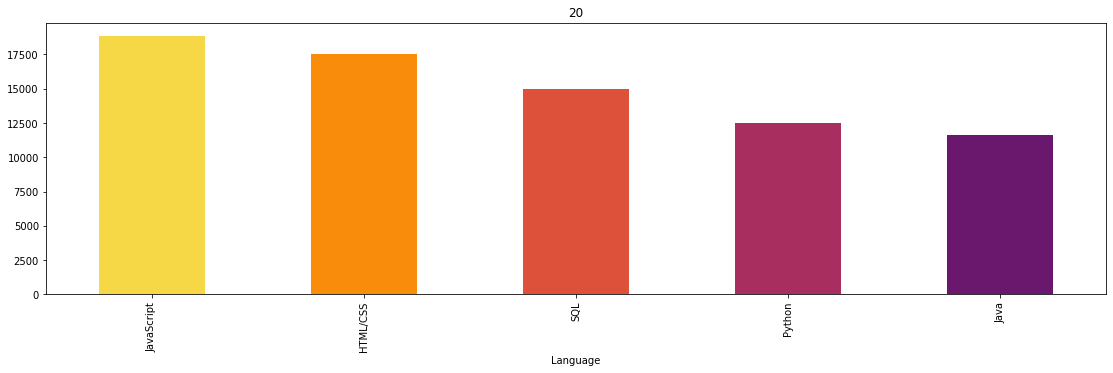

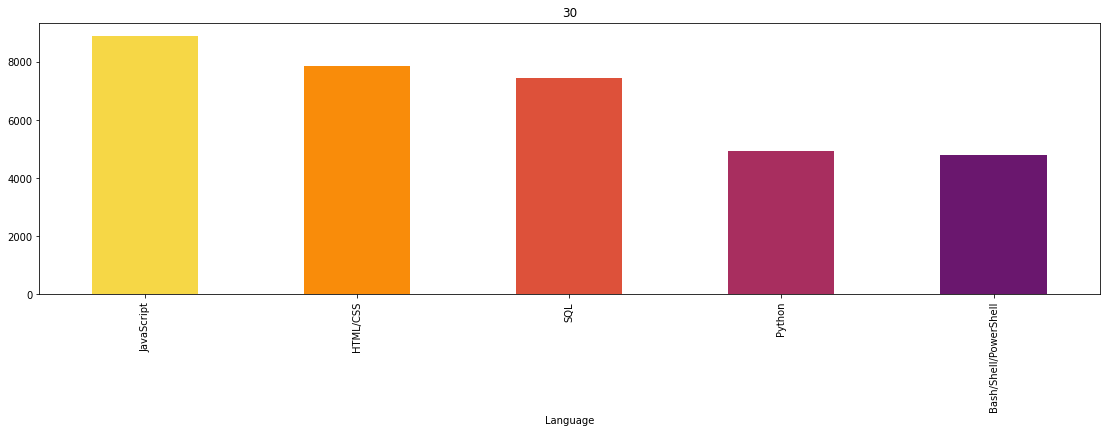

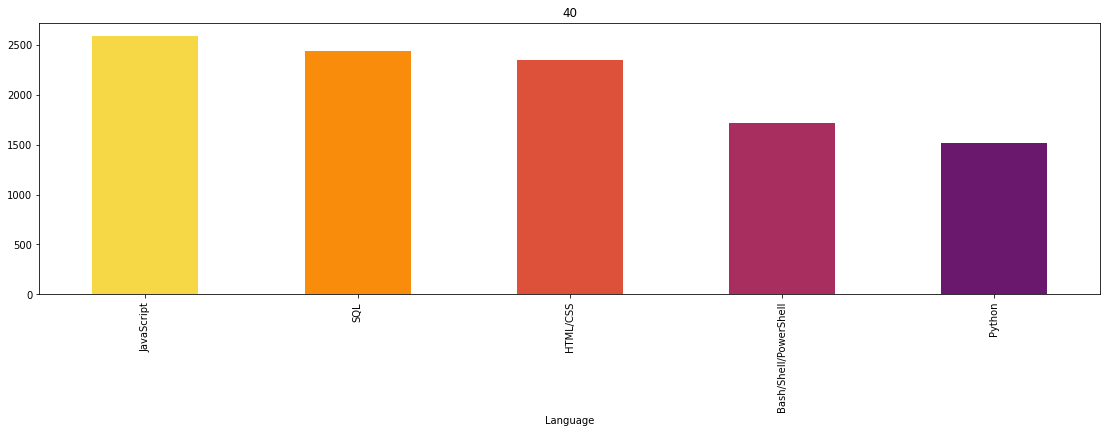

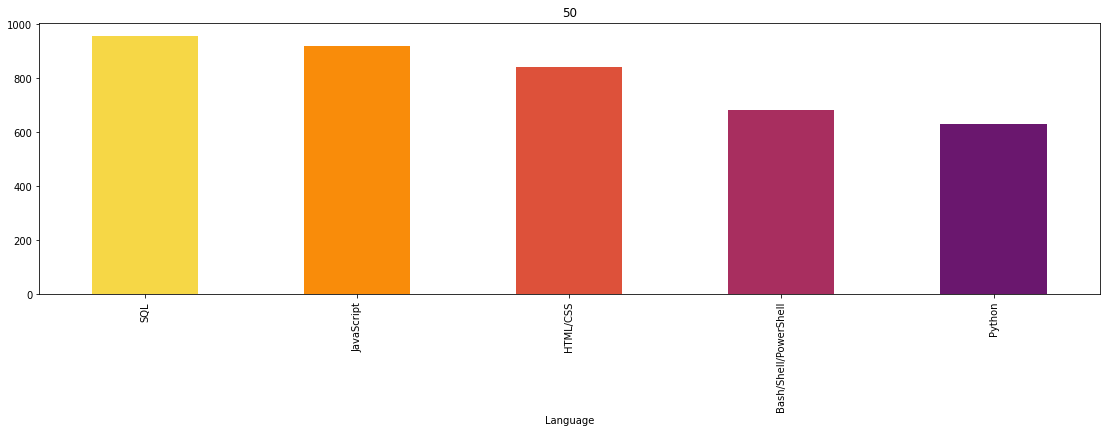

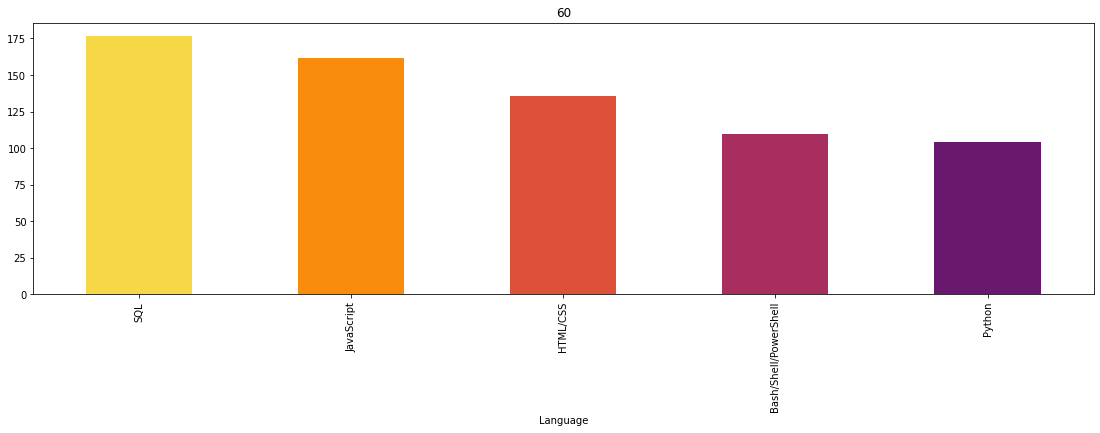

In [52]:
color = cm.inferno_r(np.linspace(.1, .7, 5))

#Iterate the dataframe of df_Language and plot the total of Language user in each Age Group
for i in range(df_Language.shape[0]):
    plt.figure(figsize=(19,5))
    df_Language.iloc[i,:].sort_values(ascending=False).head(5).plot(kind='bar',color=color, title = 10*(i+1))

Shown in the histogram above, we can see that each age group has different top 5's programming language. But surprisingly, SQL, Javascript and HTML/CSS are repetitively shown in each age group.

### **Correlation between Country and the Age Group**

To know the correlation between its country with its age group, we can start from the total of coders from each country.

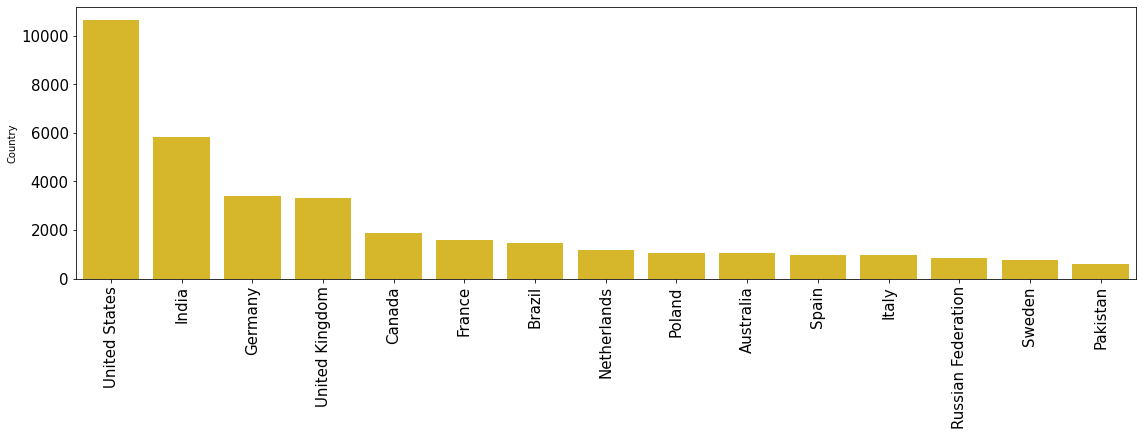

In [ ]:
#Visualize data of total coders from each country
plt.figure(figsize=(19,5))
plt.xticks(rotation='vertical', fontsize=15.0)
plt.yticks(fontsize=15.0)
sns.barplot(x=df['Country'].value_counts().index, y=df['Country'].value_counts(), color="#F2C80F", order=df['Country'].value_counts().index[:15])
plt.show()

It shows that most coders are coming from United States. Then we need to know where the coders in their 60s are coming from and starting to code from age 15 and under. These criterias are useful to see the development of programming.

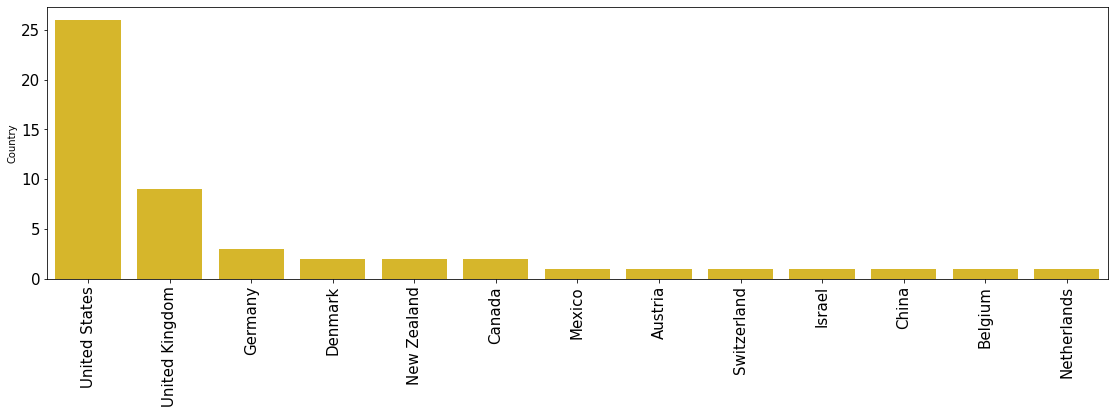

In [ ]:
#Take people in their 60s that starting to code from age of 15 and under
df_60s_people = df[(df['AgeTrend'] == '60s') & (df['Age1stCode'] <= 15)]

plt.figure(figsize=(19,5))
plt.xticks(rotation='vertical', fontsize=15.0)
plt.yticks(fontsize=15.0)
sns.barplot(x=df_60s_people['Country'].value_counts().index, y=df_60s_people['Country'].value_counts(), color="#F2C80F", order=df_60s_people['Country'].value_counts().index)
plt.show()

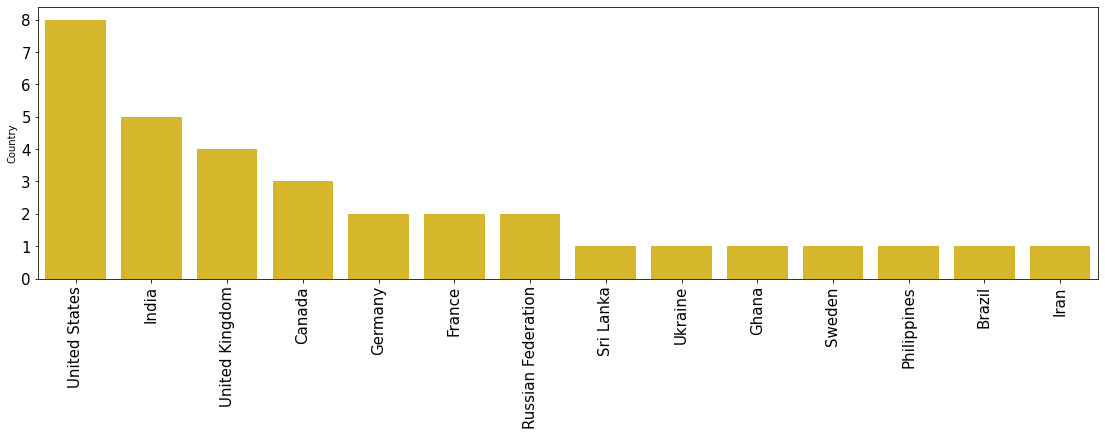

In [ ]:
#Take people in their 10s that starting to code from age 5, because it is the minimum age in this data
df_10s_people = df[(df['AgeTrend'] == '10s') & (df['Age1stCode'] == df['Age1stCode'].min())]

plt.figure(figsize=(19,5))
plt.xticks(rotation='vertical', fontsize=15.0)
plt.yticks(fontsize=15.0)
sns.barplot(x=df_10s_people['Country'].value_counts().index, y=df_10s_people['Country'].value_counts(), color="#F2C80F", order=df_10s_people['Country'].value_counts().index)
plt.show()

Based on the data, United States's people have a lot of interest in coding.